# Quantum Computing for Classical Developers

In [1]:
#imports
from IPython.display import Latex
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, transpile, execute
from qiskit.circuit.library import *
from qiskit.circuit.random import random_circuit
from qiskit.visualization import plot_histogram, array_to_latex

## Workshop contents
- Quantum Computing basics - recap
- Introduction to Quantum Gates and Circuits
- Run your first Quantum Circuit - Bell State
- Solving problems with Quantum Computers
- Deutsch-Jozsa Algorithm
- Run on real hardware

### Let's code a quantum circuit!

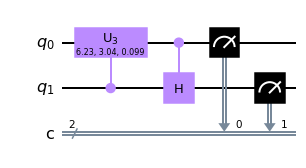

In [48]:
rand = random_circuit(2, 2, measure=True)
rand.draw('mpl')

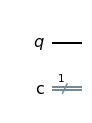

In [50]:
# qc = QuantumCircuit(1)
qc = QuantumCircuit(1, 1)
qc.draw('mpl')

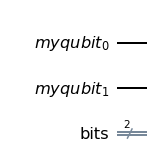

In [51]:
qr = QuantumRegister(2, name='myqubit')
cr = ClassicalRegister(2, name='bits')
qc = QuantumCircuit(cr, qr)
qc.draw('mpl')

## Quantum Gates

3 ways to represent Quantum Gates:
- circuit box model
- Dirac notation
- matrices


## Let's start with bits - 0 & 1

### bitstring = 0
Dirac notation = $|0\rangle$  
matrix = $ \begin{bmatrix} 1 \\ 0 \end{bmatrix} \, \, \, \, $

### bitstring = 1
Dirac notation = $ |1\rangle $  
matrix = $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$

## X Gate - single qubit gate

- equivalent to a classical NOT gate (i.e. a bit flip)
- flips the input bit to opposite sign
- 0 -> 1
- 1 -> 0

![](classical-not.jpg)

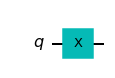

In [54]:
qc_x = QuantumCircuit(1)
qc_x.x(0)
qc_x.draw('mpl')

In [55]:
print('X (1q gate)')
xgate = XGate()
array_to_latex(xgate.to_matrix())

X (1q gate)


<IPython.core.display.Latex object>

**for an X gate applied to a qubit in state 0**

Dirac notation = $X|0\rangle$ = $|1\rangle$

matrix = $ \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0*1 + 1*0 \\ 1*1 + 0*0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

**for an X gate applied to a qubit in state 1**

Dirac notation = $X|1\rangle$ = $|0\rangle$

matrix = $ \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 0*0 + 1*1 \\ 1*0 + 0*1 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$


Applying a gate to a quantum state = matrix multiplication

## Haddamard Gate

- no classical equivalent
- puts a qubit into superposition

In [56]:
print('H (1q gate)')
hgate = HGate()
array_to_latex(hgate.to_matrix())

H (1q gate)


<IPython.core.display.Latex object>

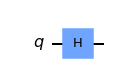

In [57]:
qc_h = QuantumCircuit(1)
qc_h.h(0)
qc_h.draw('mpl')

**for an H gate applied to a qubit in state 0**

Dirac notation = $H|0\rangle$ = $|+\rangle$ = $\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$

matrix = $ \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix}$


**for an H gate applied to a qubit in state 1**

Dirac notation = $H|1\rangle$ = $|-\rangle$ = $\frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$

matrix = $ \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

## H & X are Unitary Gates

- They are reversible
- HH = I
- XX = I

$$ X|0\rangle \rightarrow |1\rangle ~~~~~~~~ X|1\rangle \rightarrow |0\rangle \\ $$

$$H|0\rangle \rightarrow |+\rangle ~~~~~~~~ H|+\rangle \rightarrow |0\rangle \\ $$

$$H|1\rangle \rightarrow |-\rangle ~~~~~~~~ H|-\rangle \rightarrow |1\rangle$$

## Controlled-Not Gate - 2 qubit gate
- CNOT
- CX


In [58]:
print('CX (2q gate)')
cxgate = CXGate()
array_to_latex(cxgate.to_matrix())

CX (2q gate)


<IPython.core.display.Latex object>

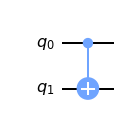

In [59]:
qc2 = QuantumCircuit(2)
qc2.cx(0,1)
qc2.draw('mpl')

If q0 = 1, q1 flips  
if q0 = 0, q1 doesn't flip


so if q0 = 1, then q1 also = 1  
and if q0 = 0, then q1 also = 0

Dirac notation:
$CNOT|00\rangle$

## Run your first Quantum Circuit

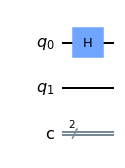

In [7]:
circ = QuantumCircuit(2, 2)
circ.h(0)
circ.reverse_bits()
circ.draw('mpl')

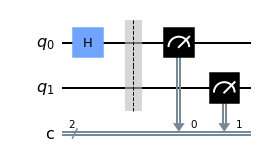

In [8]:
circ.barrier()
circ.measure([0,1], [0,1])
circ.draw('mpl')

In [9]:
sim = Aer.get_backend('aer_simulator')
transpiled = transpile(circ, sim)
result = sim.run(transpiled, shots=1000).result()
counts = result.get_counts()
print(counts)

{'01': 501, '00': 499}


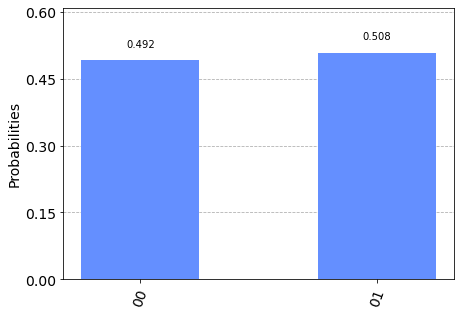

In [63]:
plot_histogram(counts)

## The Bell State

- Simplest implementation of entanglement
- Add a CNOT: control = q0 target = q1

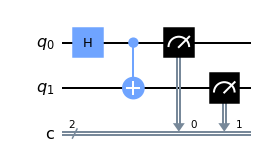

In [10]:
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0,1)
bell.measure([0,1], [0,1])
bell.draw('mpl')

Dirac notation:

$ CNOT|0{+}\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$

In [11]:
sim = Aer.get_backend('aer_simulator')
transpiled_bell = transpile(bell, sim)
result = sim.run(transpiled_bell, shots=1000).result()
bell_counts = result.get_counts()
print(bell_counts)

{'00': 467, '11': 533}


{'00': 467, '11': 533}


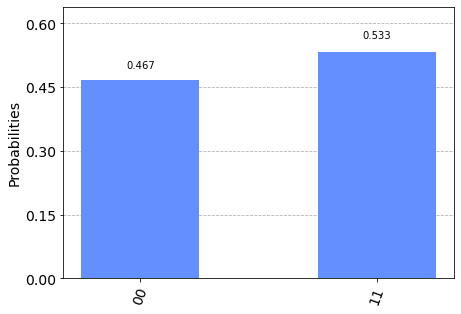

In [12]:
print(bell_counts)
plot_histogram(bell_counts)

### Run your Bell State on real hardware

In [43]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

# Go to https://quantum-computing.ibm.com/
# Register
# On your welcome page you should see API token field which you can copy and use during lab
# IBMQ.save_account("<token>")

provider = IBMQ.load_account()

least_busy_device = least_busy(provider.backends(simulator=False, filters=lambda b: b.configuration().n_qubits >= 2))

least_busy_device

ibmqfactory.load_account:WARNING:2022-04-27 19:04:21,663: Credentials are already in use. The existing account in the session will be replaced.


<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>

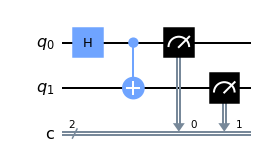

In [19]:
bell.draw('mpl')

In [20]:
job = execute(bell, backend=least_busy_device, shots=1000)

In [21]:
job.status()

<JobStatus.ERROR: 'job incurred error'>

In [17]:
job.wait_for_final_state()
job.status()

<JobStatus.ERROR: 'job incurred error'>

In [42]:
counts = job.result().get_counts()
plot_histogram(counts)

IBMQJobFailureError: "Unable to retrieve result for job 6269a4ad9e8c24578f466be9. Job has failed: The Qobj uses gates (['h']) that are not among the basis gates (['id', 'rz', 'sx', 'x', 'cx', 'reset']). Error code: 1106."

# Ex 1
The GHZ state is similar to a Bell State but with 3 qubits. When measured it will produce outcomes of 000 or 111.  

The dirac notation for the GHZ state is $\frac{1}{\sqrt{2}}(|000\rangle + |111\rangle)$.  

In the cell below, create a quantum circuit for the GHZ state

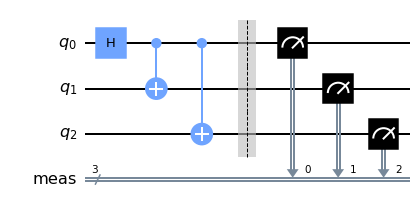

In [27]:
# Add your code here, you must name your quantum circuit ghz

ghz.draw('mpl')

# Ex 2
In the cell below create a quantum circuit that, when run on a quantum simulator with a single shot, could act as a random number generator. Your circuit should be able to generate any number from 0 to 31 (inclusive)

In [41]:
# Add your code here
